<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Env</b></font></h3>
</div>

</body>
</html>

In [2]:
# import standard packages
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# suppress warnings
warnings.filterwarnings('ignore')

# adjust dataframe demonstration options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# define static configurations
class C:
    TARGET_VARIABLE = '-'
    NOTEBOOK_PATH = os.getcwd()
    SRC_PATH = os.path.dirname(NOTEBOOK_PATH)
    RAW_DF_PATH = os.path.join(SRC_PATH, 'data/DATASET 1 (BOSLUKSUZ) CSV.csv')
    EDITED_DF_PATH = os.path.join(SRC_PATH, 'data/freq_surface.csv')
    
# load data
df = pd.read_csv(C.RAW_DF_PATH)

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Apply</b></font></h3>
</div>

</body>
</html>

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: left;">
    <h5><font color='gray'><b>Convert object to float</b></font></h5>
</div>

</body>
</html>

In [3]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
obj_cols

['r4',
 'w1',
 'r3',
 'r2',
 'w2',
 'r1',
 'r0',
 'f1',
 'f2',
 'bw1',
 'bw2',
 'bw1-1',
 'bw1-2',
 'bw2-1',
 'bw2-2']

In [4]:
for obj_col in obj_cols:
    df[obj_col] = df[obj_col].str.replace(',', '.') # replace x,xx to x.xx units before converting str to float 
    df[obj_col] = df[obj_col].astype(float)

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: left;">
    <h5><font color='gray'><b>Handle missing values</b></font></h5>
</div>

</body>
</html>

In [5]:
df[df.isna().any(axis=1)]

,x,y,r4,w1,r3,r2,w2,r1,r0,f1,f2,bw1,bw2,bw1-1,bw1-2,bw2-1,bw2-2
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,10.0,10.0,3.25,0.50,2.75,2.50,0.25,2.25,2.0,12.413,15.382,0.505,NaN,12.10,12.606,15.034,15.63
187,10.0,10.0,3.25,1.25,2.00,1.75,1.00,0.75,0.5,16.503,-1.000,1.484,-1.0,15.61,17.095,NaN,NaN
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# handle edge case for null values
df.loc[147, 'bw2'] = float(df[147:148]['bw2-2'] - df[147:148]['bw2-1'])
df.loc[187, ['bw2-2', 'bw2-1']] = -1

# drop rows that contain just null values
df.dropna(axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Observe</b></font></h3>
</div>

</body>
</html>

In [7]:
df.shape

(1691, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0    x      1691 non-null   float64
 1   y       1691 non-null   float64
 2   r4      1691 non-null   float64
 3   w1      1691 non-null   float64
 4   r3      1691 non-null   float64
 5   r2      1691 non-null   float64
 6   w2      1691 non-null   float64
 7   r1      1691 non-null   float64
 8   r0      1691 non-null   float64
 9   f1      1691 non-null   float64
 10  f2      1691 non-null   float64
 11  bw1     1691 non-null   float64
 12  bw2     1691 non-null   float64
 13  bw1-1   1691 non-null   float64
 14  bw1-2   1691 non-null   float64
 15  bw2-1   1691 non-null   float64
 16  bw2-2   1691 non-null   float64
dtypes: float64(17)
memory usage: 224.7 KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
x,1691.0,10.000000,0.000000,10.000,10.0000,10.000,10.0000,10.000
y,1691.0,10.000000,0.000000,10.000,10.0000,10.000,10.0000,10.000
r4,1691.0,4.004731,0.449498,3.000,3.7500,4.000,4.5000,4.500
w1,1691.0,0.873300,0.587552,0.250,0.5000,0.750,1.2500,3.000
r3,1691.0,3.131431,0.667328,1.250,2.7500,3.250,3.7500,4.250
r2,1691.0,2.881431,0.667328,1.000,2.5000,3.000,3.5000,4.000
w2,1691.0,0.877144,0.591127,0.250,0.5000,0.750,1.2500,3.250
r1,1691.0,2.004287,0.705602,0.750,1.5000,2.000,2.5000,3.750
r0,1691.0,1.127144,0.591127,0.500,0.7500,1.000,1.5000,3.500
f1,1691.0,11.061307,3.077110,-1.000,9.4795,10.550,12.4910,18.000


In [10]:
df.sample(10)

,x,y,r4,w1,r3,r2,w2,r1,r0,f1,f2,bw1,bw2,bw1-1,bw1-2,bw2-1,bw2-2
53,10.0,10.0,3.00,0.75,2.25,2.00,1.25,0.75,0.50,15.067,-1.000,0.847,-1.000,14.565,15.412,-1.000,-1.000
982,10.0,10.0,4.25,0.50,3.75,3.50,0.50,3.00,1.25,8.920,13.250,0.521,2.496,8.571,9.091,11.910,14.406
243,10.0,10.0,3.50,0.25,3.25,3.00,0.50,2.50,2.00,10.463,14.203,0.333,1.024,10.238,10.572,13.615,14.639
1522,10.0,10.0,4.50,1.00,3.50,3.25,0.50,2.75,2.25,9.464,12.850,0.992,1.328,8.799,9.791,12.112,13.440
763,10.0,10.0,4.00,1.00,3.00,2.75,0.75,2.00,0.75,11.250,-1.000,0.939,-1.000,10.636,11.575,16.815,-1.000
1166,10.0,10.0,4.25,1.50,2.75,2.50,0.25,2.25,1.00,12.250,17.000,1.528,-1.000,11.186,12.714,15.615,-1.000
236,10.0,10.0,3.50,0.25,3.25,3.00,1.00,2.00,1.50,10.470,17.181,0.349,1.703,10.256,10.605,16.188,17.891
504,10.0,10.0,3.75,1.00,2.75,2.50,0.50,2.00,0.50,12.350,-1.000,0.921,-1.000,11.755,12.676,17.297,-1.000
1005,10.0,10.0,4.25,0.50,3.75,3.50,1.00,2.50,2.00,8.889,14.080,0.552,1.744,8.532,9.084,13.044,14.788
1680,10.0,10.0,4.50,2.50,2.00,1.75,0.50,1.25,1.00,16.210,-1.000,4.085,-1.000,13.421,17.506,-1.000,-1.000


<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Check</b></font></h3>
</div>

</body>
</html>

In [11]:
# check any observation unit contrasts with surface radius logic 
fancy_index = (df['r0'] < df['r1']) & (df['r1'] < df['r2']) & (df['r2'] < df['r3']) & (df['r3'] < df['r4'])
bool(df.shape[0] - len(df[fancy_index]))

False

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Visualise</b></font></h3>
</div>

</body>
</html>

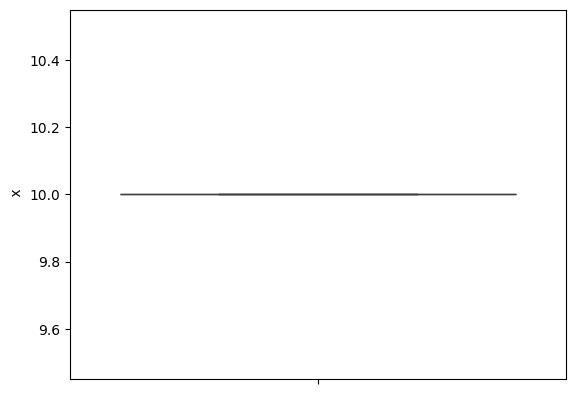

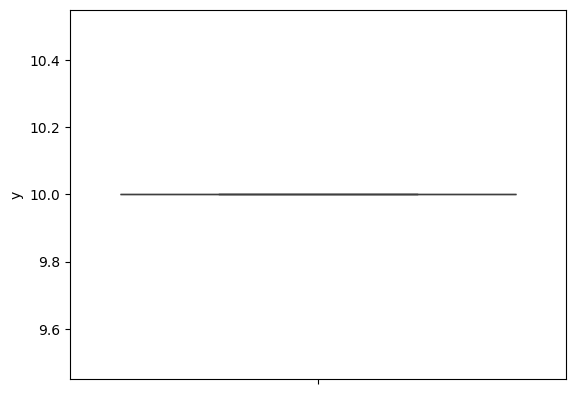

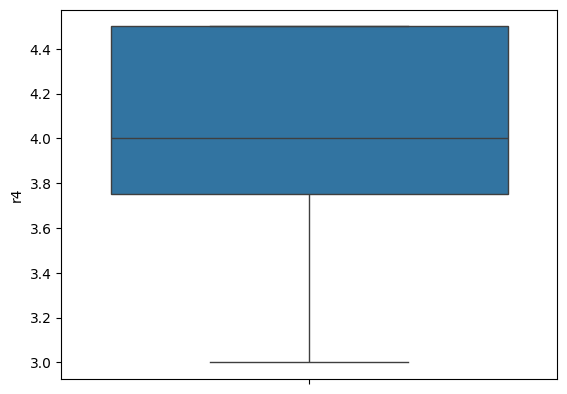

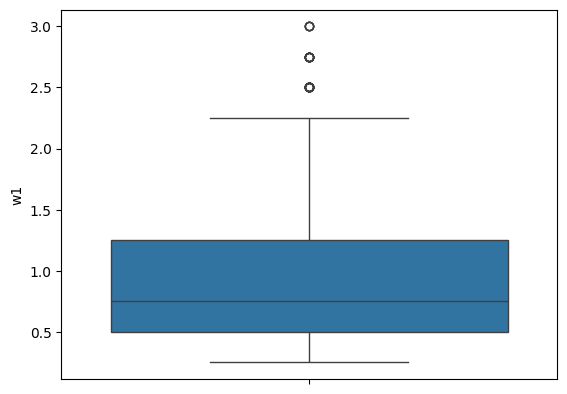

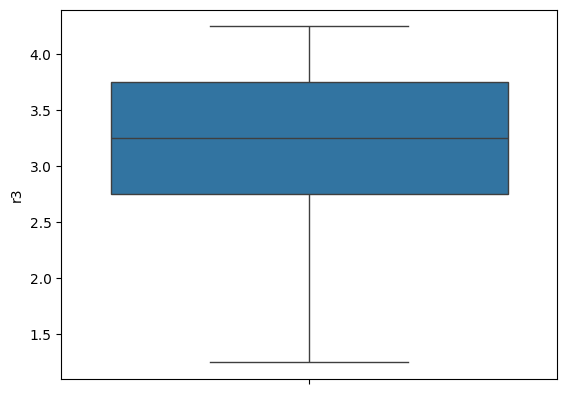

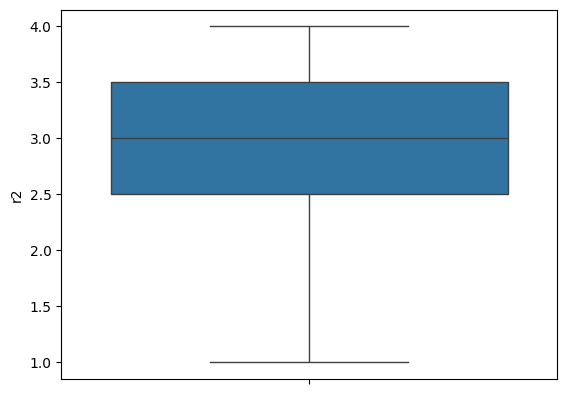

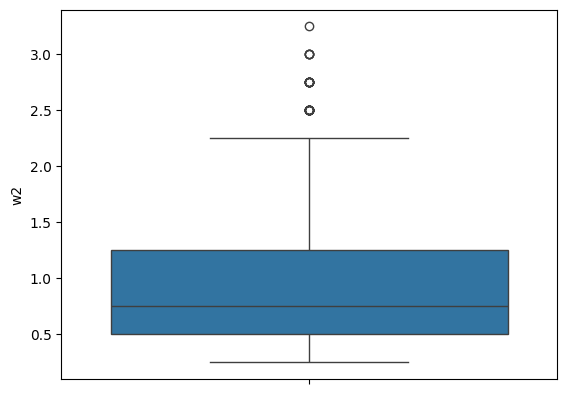

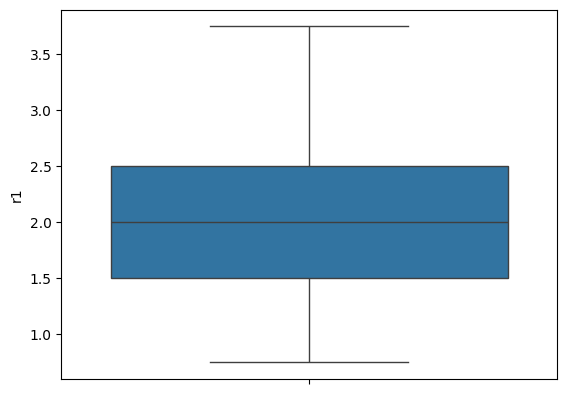

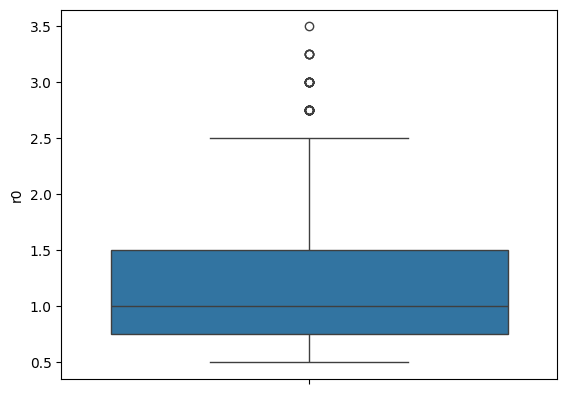

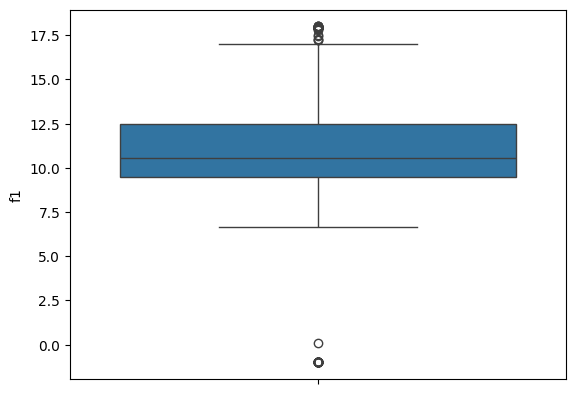

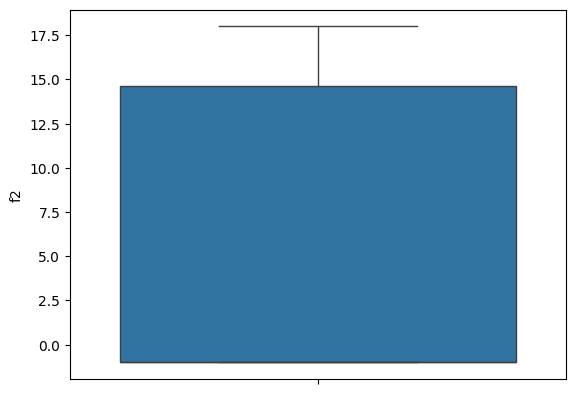

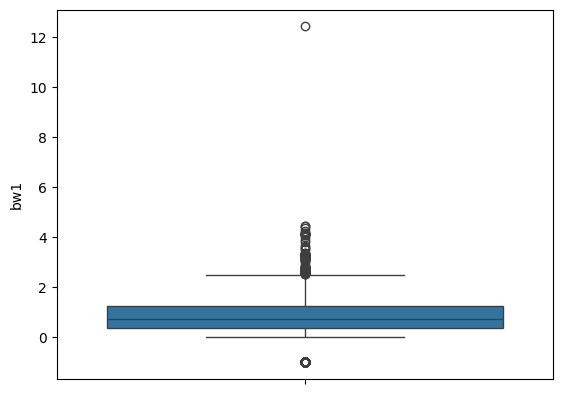

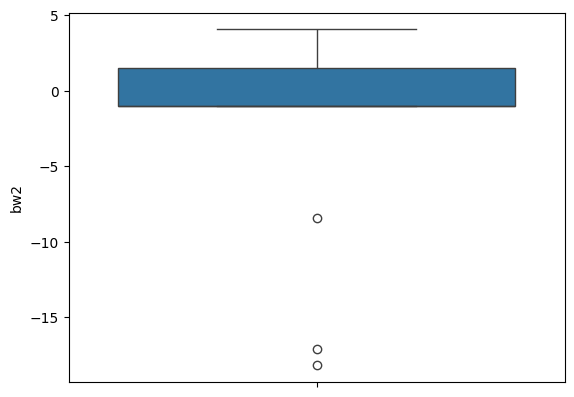

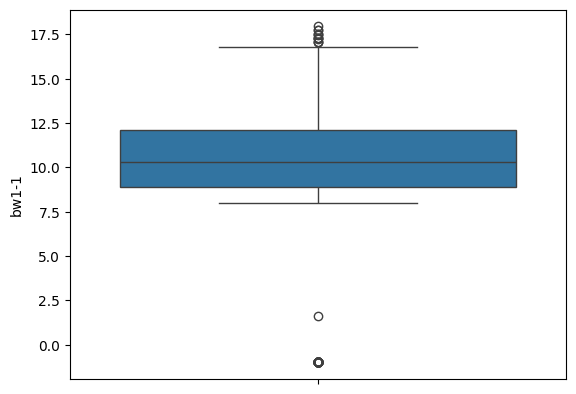

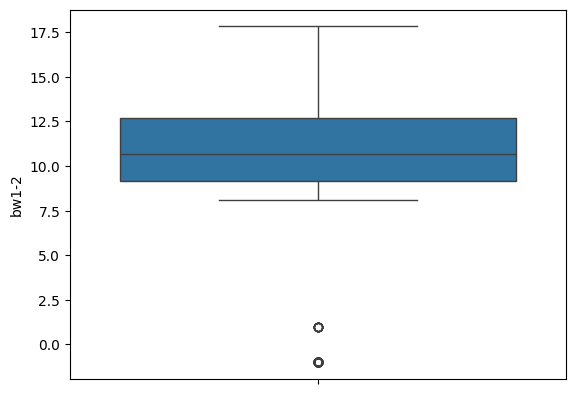

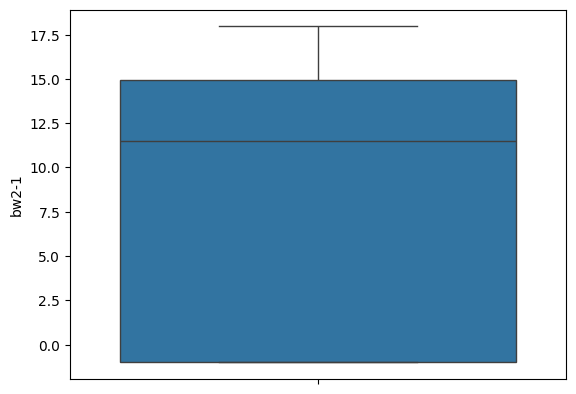

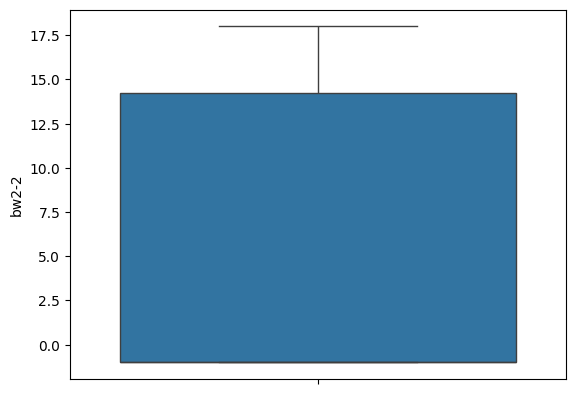

In [12]:
for col in df.columns:
    plt.title = col
    sns.boxplot(df[col])
    plt.show();

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Drop</b></font></h3>
</div>

</body>
</html>

In [13]:
drop_cols = [' x', 'y', 'w1', 'w2', 'bw1', 'bw2', 'bw1-1', 'bw1-2', 'bw2-1', 'bw2-2']
df.drop(drop_cols, axis=1, inplace=True)

<!DOCTYPE html>
<html>
<head>
    <title>Centralized Heading</title>
</head>
<body>

<div style="text-align: center;">
    <h3><font color='pink'><b>Export</b></font></h3>
</div>

</body>
</html>

In [14]:
# export dataframe
df.to_csv(C.EDITED_DF_PATH, index_label=False)